In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

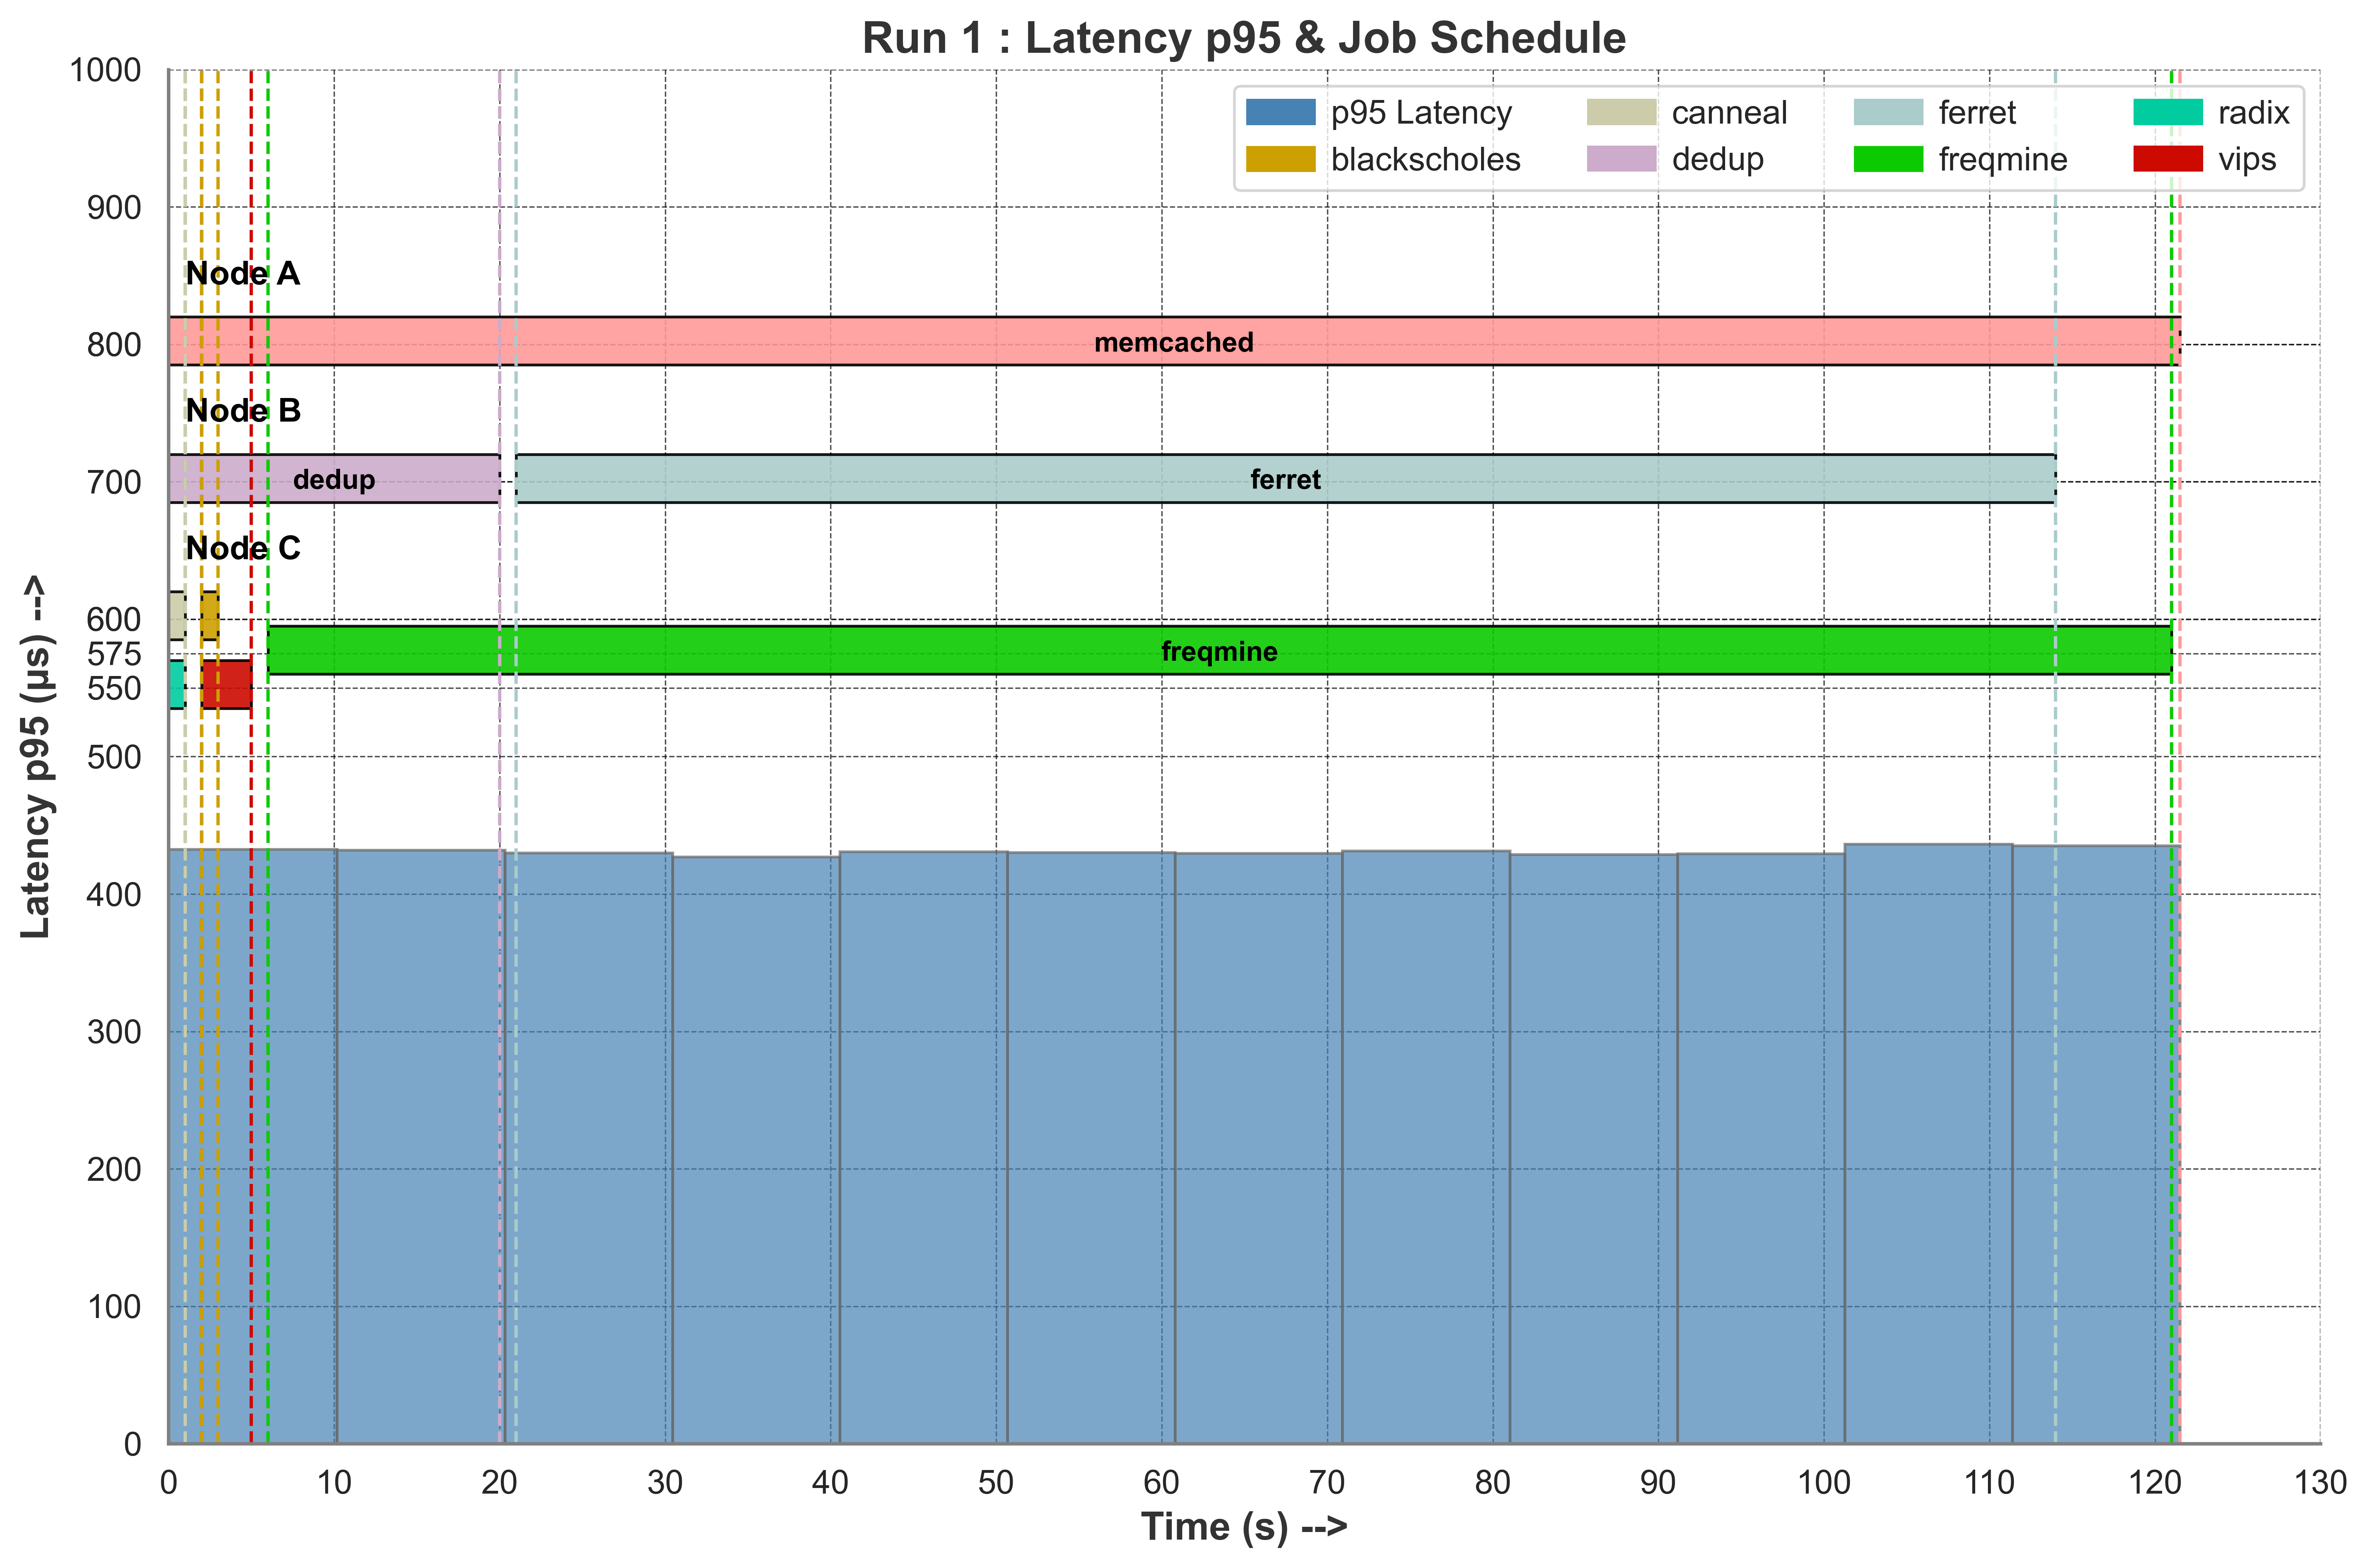

In [113]:
# Define the colors extracted from your LaTeX definitions
colors = {
    'p95 Latency' : 'steelblue',
    'blackscholes': '#CCA000',
    'canneal': '#CCCCAA',
    'dedup': '#CCACCA',
    'ferret': '#AACCCA',
    'freqmine': '#0CCA00',
    'radix': '#00CCA0',
    'vips': '#CC0A00',
    'memcached': '#ff9999'
}

df = pd.read_csv("memcached_latency.csv", usecols=["type", "p95", "left", "right"])
df = df[df["type"] == 1]

# Calculate the width and center for the bars
df['width'] = df['right'] - df['left']
df['center'] = (df['right'] + df['left']) / 2

# Set up the plot with an increased figure size and higher DPI for clarity
plt.figure(figsize=(12, 8), dpi=500)

# Plotting the p95 latency bars
plt.bar(df['center'], df['p95'], width=df['width'], color='steelblue', edgecolor='dimgray', alpha=0.7, label='p95 Latency')

# Define sample jobs with their start and end times, the node they run on, and colors
jobs = [
    {'name': 'memcached', 'start': 0, 'end': max(df["right"]), 'node': 'Node A'},
    {'name': 'dedup', 'start': 0, 'end': 20, 'node': 'Node B'},
    {'name': 'ferret', 'start': 21, 'end': 114, 'node': 'Node B'},
    {'name': 'radix', 'start': 0, 'end': 1, 'node': 'Node C1'},
    {'name': 'canneal', 'start': 0, 'end': 1, 'node': 'Node C2'},
    {'name': 'vips', 'start': 2, 'end': 5, 'node': 'Node C1'},
    {'name': 'blackscholes', 'start': 2, 'end': 3, 'node': 'Node C2'},
    {'name': 'freqmine', 'start': 6, 'end': 121, 'node': 'Node C'}
]

# Y positions for the annotations for each node, adjusted for clarity
node_levels = {'Node A': 800, 'Node B': 700, 'Node C1': 550, 'Node C2': 600, 'Node C':575}
node_levels_ = {'Node A': 800, 'Node B': 700, 'Node C': 600}
# Add labels for each node section
for node, level in node_levels_.items():
    plt.text(x_min + 1, level + 50, node, fontsize=12, fontweight='bold', color='black', va='center')

# Annotate jobs on the plot
for job in jobs:
    # Job position and width
    job_center = (job['start'] + job['end']) / 2
    job_width = job['end'] - job['start']
    
    # Draw a rectangle for the job duration, slightly below the line for clarity
    plt.bar(job_center, 35, bottom=node_levels[job['node']] - 15, width=job_width, color=colors[job['name']], edgecolor='black', alpha=0.9)
    
    # Annotate the job name within the rectangle, adjusting the vertical position for clarity
    if(job_width>10):
        plt.text(job_center, node_levels[job['node']], job['name'], ha='center', va='center', fontsize=10, fontweight='bold', color='black')

    plt.vlines(job['start'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)
    plt.vlines(job['end'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)

# Customize the plot
plt.xlabel('Time (s) -->', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('Latency p95 (μs) -->', fontsize=14, fontweight='bold', color='#333')
plt.title('Run 1 : Latency p95 & Job Schedule', fontsize=16, fontweight='bold', color='#333')

# Set x and y axis limits and ticks for a comprehensive view
x_min, x_max = 0, np.ceil(df['right'].max() / 10) * 10
plt.xlim(x_min, x_max)
plt.ylim(0, 1000)
plt.xticks(np.arange(x_min, x_max + 1, 10), fontsize=12)
plt.yticks(list(range(0, 1001, 100)) + list(node_levels.values()), fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

# Despine for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Add a legend to identify latency and jobs
legend_patches = [Patch(color=colors[name], label=name) for name in list(colors.keys())[:-1]]
plt.legend(handles=legend_patches, fontsize=12, frameon=True, loc='upper right', ncol=len(legend_patches)//2, handletextpad=0.5)

plt.tight_layout()
plt.savefig("part_3_run_1.png")
plt.show()

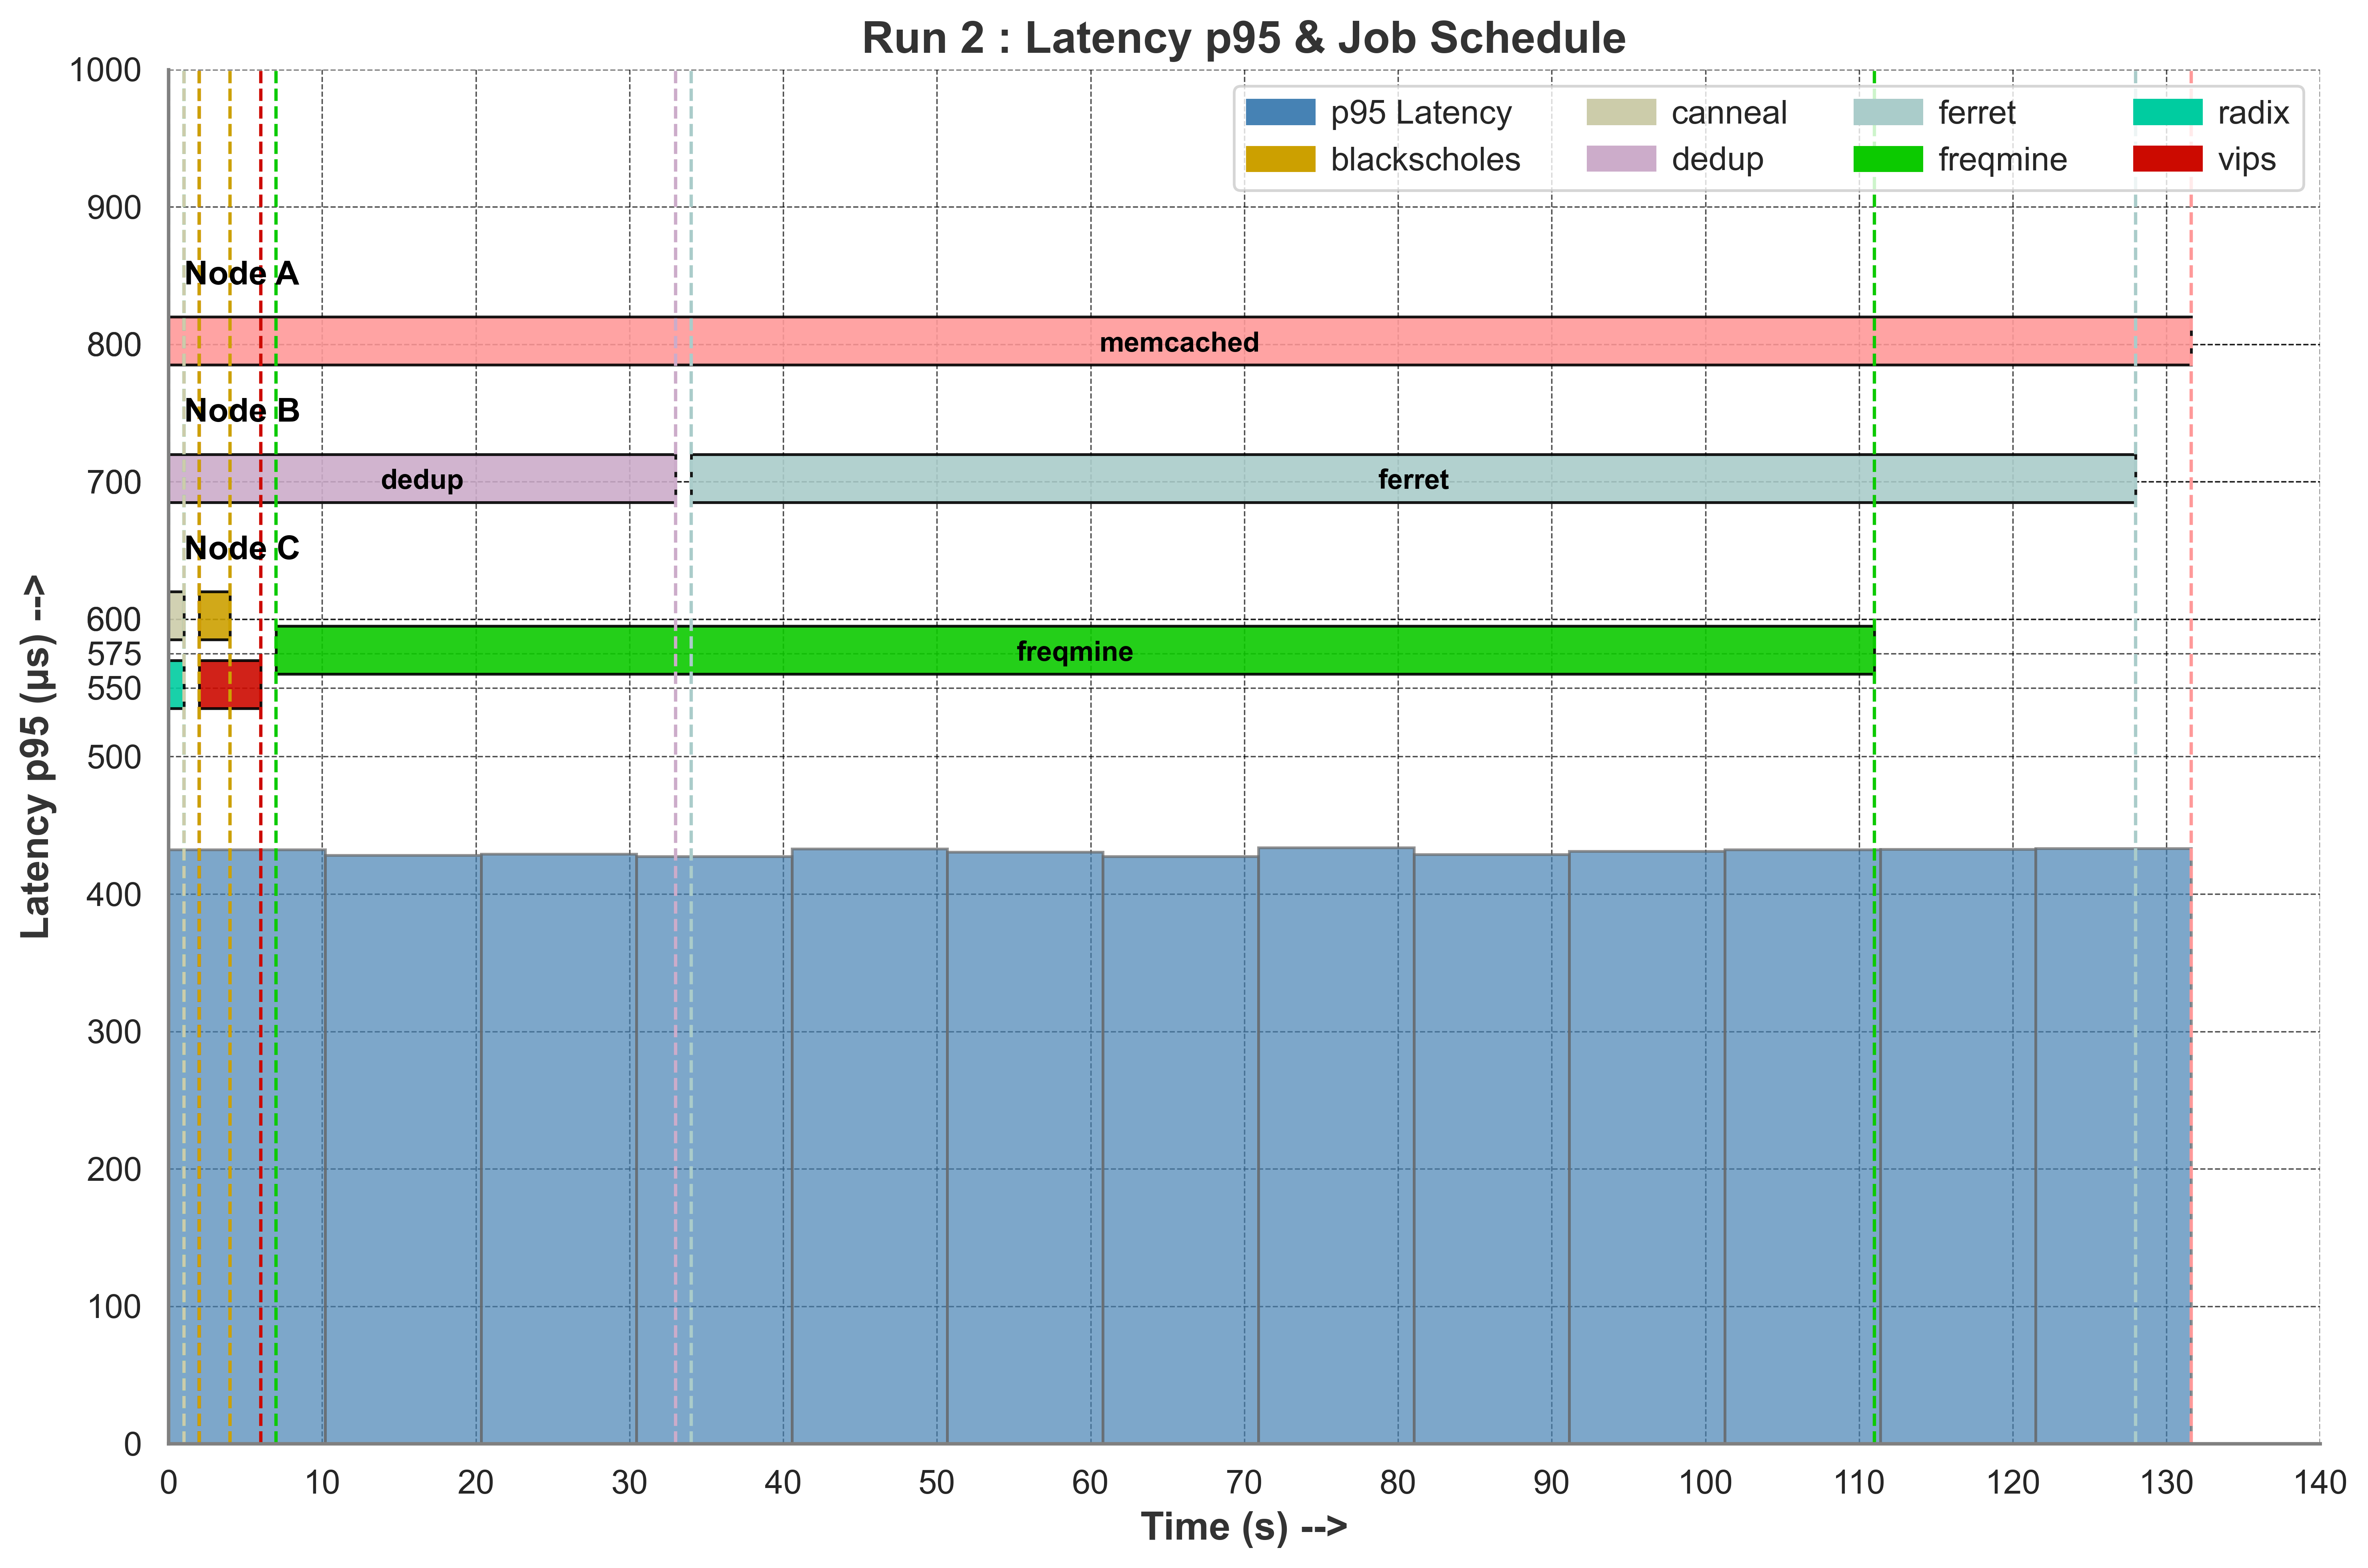

In [112]:
# Define the colors extracted from your LaTeX definitions
colors = {
    'p95 Latency' : 'steelblue',
    'blackscholes': '#CCA000',
    'canneal': '#CCCCAA',
    'dedup': '#CCACCA',
    'ferret': '#AACCCA',
    'freqmine': '#0CCA00',
    'radix': '#00CCA0',
    'vips': '#CC0A00',
    'memcached': '#ff9999'
}

df = pd.read_csv("memcached_latency.csv", usecols=["type", "p95", "left", "right"])
df = df[df["type"] == 2]

# Calculate the width and center for the bars
df['width'] = df['right'] - df['left']
df['center'] = (df['right'] + df['left']) / 2

# Set up the plot with an increased figure size and higher DPI for clarity
plt.figure(figsize=(12, 8), dpi=500)

# Plotting the p95 latency bars
plt.bar(df['center'], df['p95'], width=df['width'], color='steelblue', edgecolor='dimgray', alpha=0.7, label='p95 Latency')

# Define sample jobs with their start and end times, the node they run on, and colors
jobs = [
    {'name': 'memcached', 'start': 0, 'end': max(df["right"]), 'node': 'Node A'},
    {'name': 'dedup', 'start': 0, 'end': 33, 'node': 'Node B'},
    {'name': 'ferret', 'start': 34, 'end': 128, 'node': 'Node B'},
    {'name': 'radix', 'start': 0, 'end': 1, 'node': 'Node C1'},
    {'name': 'canneal', 'start': 0, 'end': 1, 'node': 'Node C2'},
    {'name': 'vips', 'start': 2, 'end': 6, 'node': 'Node C1'},
    {'name': 'blackscholes', 'start': 2, 'end': 4, 'node': 'Node C2'},
    {'name': 'freqmine', 'start': 7, 'end': 111, 'node': 'Node C'}
]

# Y positions for the annotations for each node, adjusted for clarity
node_levels = {'Node A': 800, 'Node B': 700, 'Node C1': 550, 'Node C2': 600, 'Node C':575}
node_levels_ = {'Node A': 800, 'Node B': 700, 'Node C': 600}
# Add labels for each node section
for node, level in node_levels_.items():
    plt.text(x_min + 1, level + 50, node, fontsize=12, fontweight='bold', color='black', va='center')

# Annotate jobs on the plot
for job in jobs:
    # Job position and width
    job_center = (job['start'] + job['end']) / 2
    job_width = job['end'] - job['start']
    
    # Draw a rectangle for the job duration, slightly below the line for clarity
    plt.bar(job_center, 35, bottom=node_levels[job['node']] - 15, width=job_width, color=colors[job['name']], edgecolor='black', alpha=0.9)
    
    # Annotate the job name within the rectangle, adjusting the vertical position for clarity
    if(job_width>10):
        plt.text(job_center, node_levels[job['node']], job['name'], ha='center', va='center', fontsize=10, fontweight='bold', color='black')

    plt.vlines(job['start'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)
    plt.vlines(job['end'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)

# Customize the plot
plt.xlabel('Time (s) -->', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('Latency p95 (μs) -->', fontsize=14, fontweight='bold', color='#333')
plt.title('Run 2 : Latency p95 & Job Schedule', fontsize=16, fontweight='bold', color='#333')

# Set x and y axis limits and ticks for a comprehensive view
x_min, x_max = 0, np.ceil(df['right'].max() / 10) * 10
plt.xlim(x_min, x_max)
plt.ylim(0, 1000)
plt.xticks(np.arange(x_min, x_max + 1, 10), fontsize=12)
plt.yticks(list(range(0, 1001, 100)) + list(node_levels.values()), fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

# Despine for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Add a legend to identify latency and jobs
legend_patches = [Patch(color=colors[name], label=name) for name in list(colors.keys())[:-1]]
plt.legend(handles=legend_patches, fontsize=12, frameon=True, loc='upper right', ncol=len(legend_patches)//2, handletextpad=0.5)

plt.tight_layout()
plt.savefig("part_3_run_2.png")
plt.show()

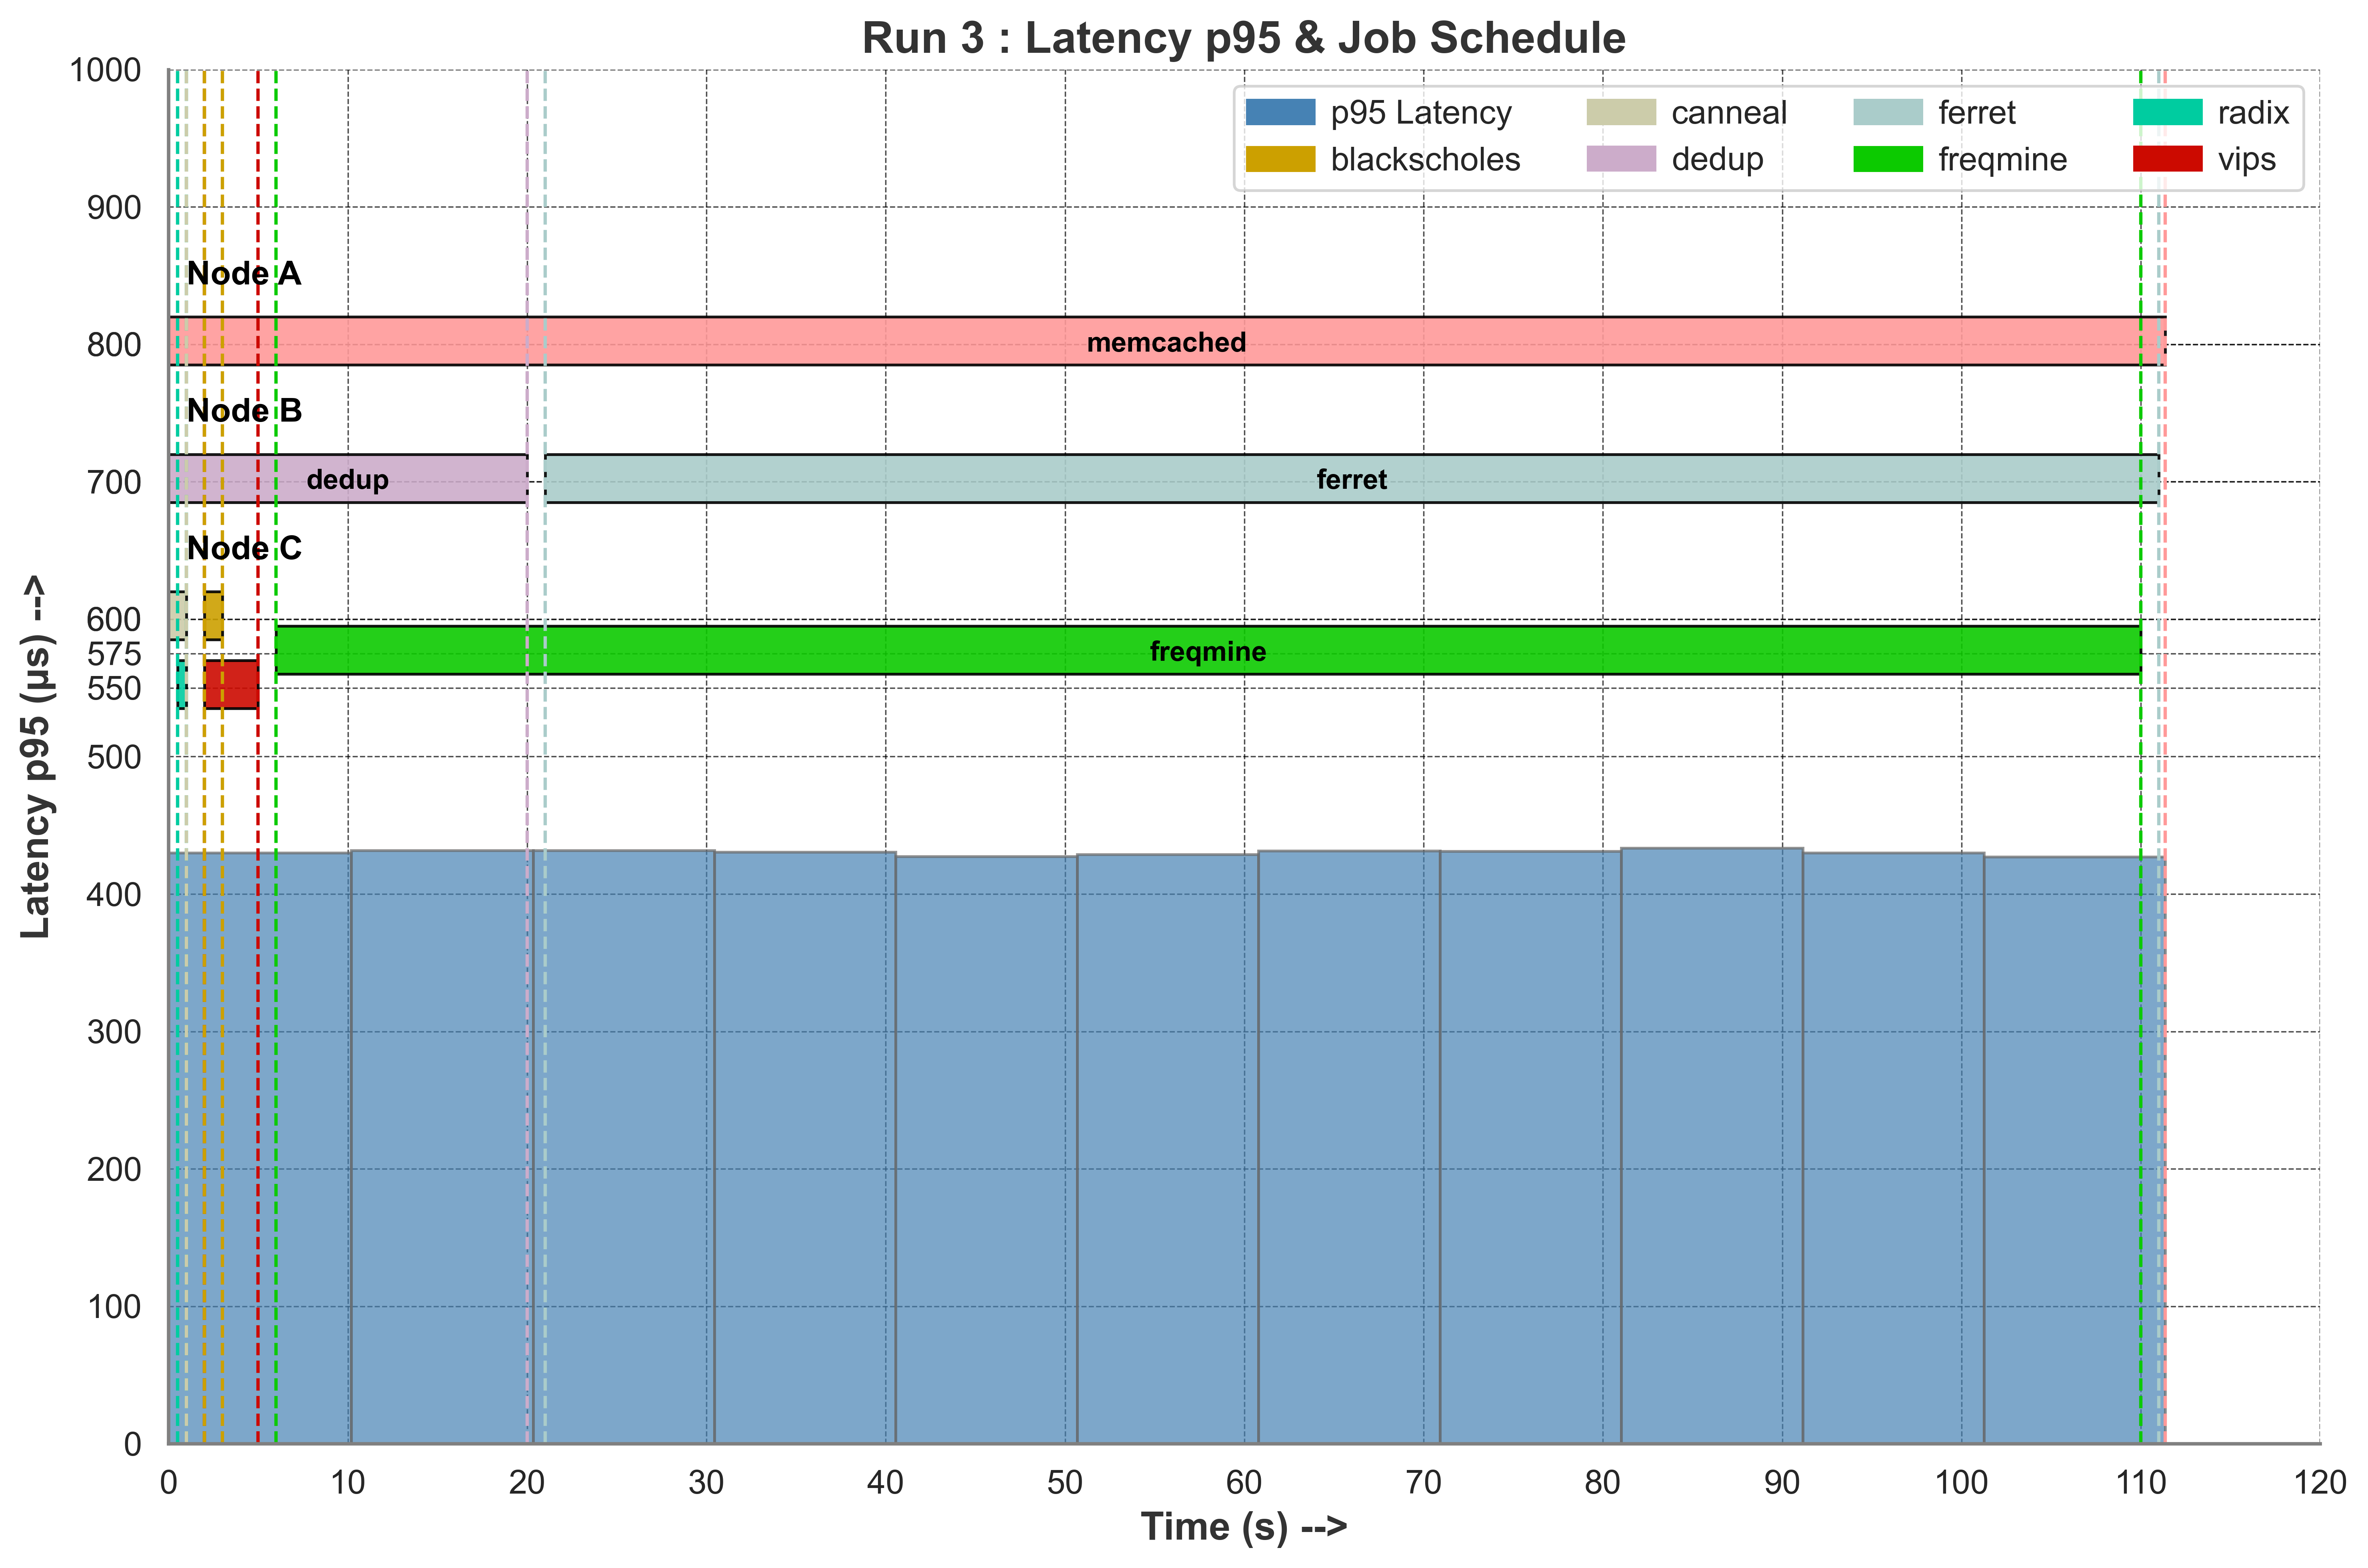

In [117]:
# Define the colors extracted from your LaTeX definitions
colors = {
    'p95 Latency' : 'steelblue',
    'blackscholes': '#CCA000',
    'canneal': '#CCCCAA',
    'dedup': '#CCACCA',
    'ferret': '#AACCCA',
    'freqmine': '#0CCA00',
    'radix': '#00CCA0',
    'vips': '#CC0A00',
    'memcached': '#ff9999'
}

df = pd.read_csv("memcached_latency.csv", usecols=["type", "p95", "left", "right"])
df = df[df["type"] == 3]

# Calculate the width and center for the bars
df['width'] = df['right'] - df['left']
df['center'] = (df['right'] + df['left']) / 2

# Set up the plot with an increased figure size and higher DPI for clarity
plt.figure(figsize=(12, 8), dpi=500)

# Plotting the p95 latency bars
plt.bar(df['center'], df['p95'], width=df['width'], color='steelblue', edgecolor='dimgray', alpha=0.7, label='p95 Latency')

# Define sample jobs with their start and end times, the node they run on, and colors
jobs = [
    {'name': 'memcached', 'start': 0, 'end': max(df["right"]), 'node': 'Node A'},
    {'name': 'dedup', 'start': 0, 'end': 20, 'node': 'Node B'},
    {'name': 'ferret', 'start': 21, 'end': 111, 'node': 'Node B'},
    {'name': 'radix', 'start': 0.5, 'end': 1, 'node': 'Node C1'},
    {'name': 'canneal', 'start': 0, 'end': 1, 'node': 'Node C2'},
    {'name': 'vips', 'start': 2, 'end': 5, 'node': 'Node C1'},
    {'name': 'blackscholes', 'start': 2, 'end': 3, 'node': 'Node C2'},
    {'name': 'freqmine', 'start': 6, 'end': 110, 'node': 'Node C'}
]

# Y positions for the annotations for each node, adjusted for clarity
node_levels = {'Node A': 800, 'Node B': 700, 'Node C1': 550, 'Node C2': 600, 'Node C':575}
node_levels_ = {'Node A': 800, 'Node B': 700, 'Node C': 600}
# Add labels for each node section
for node, level in node_levels_.items():
    plt.text(x_min + 1, level + 50, node, fontsize=12, fontweight='bold', color='black', va='center')

# Annotate jobs on the plot
for job in jobs:
    # Job position and width
    job_center = (job['start'] + job['end']) / 2
    job_width = job['end'] - job['start']
    
    # Draw a rectangle for the job duration, slightly below the line for clarity
    plt.bar(job_center, 35, bottom=node_levels[job['node']] - 15, width=job_width, color=colors[job['name']], edgecolor='black', alpha=0.9)
    
    # Annotate the job name within the rectangle, adjusting the vertical position for clarity
    if(job_width>10):
        plt.text(job_center, node_levels[job['node']], job['name'], ha='center', va='center', fontsize=10, fontweight='bold', color='black')

    plt.vlines(job['start'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)
    plt.vlines(job['end'], 0, 1000, colors= colors[job['name']], linestyles='dashed', linewidth=1.2, alpha=1)

# Customize the plot
plt.xlabel('Time (s) -->', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('Latency p95 (μs) -->', fontsize=14, fontweight='bold', color='#333')
plt.title('Run 3 : Latency p95 & Job Schedule', fontsize=16, fontweight='bold', color='#333')

# Set x and y axis limits and ticks for a comprehensive view
x_min, x_max = 0, np.ceil(df['right'].max() / 10) * 10
plt.xlim(x_min, x_max)
plt.ylim(0, 1000)
plt.xticks(np.arange(x_min, x_max + 1, 10), fontsize=12)
plt.yticks(list(range(0, 1001, 100)) + list(node_levels.values()), fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

# Despine for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Add a legend to identify latency and jobs
legend_patches = [Patch(color=colors[name], label=name) for name in list(colors.keys())[:-1]]
plt.legend(handles=legend_patches, fontsize=12, frameon=True, loc='upper right', ncol=len(legend_patches)//2, handletextpad=0.5)

plt.tight_layout()
plt.savefig("part_3_run_3.png")
plt.show()